# Heaps

## Darstellung von Arrays als vollständige Binärebäume

Bevor wir mit der Implementation von Heaps beginnen, schreiben wir eine Hilfsmethode, die uns ein Array als Baum interprätieren lässt und diesen graphisch darstellt. Wir nutzen dazu Graphiz. Die Details von Graphviz sind hier nicht relevant. 

In [172]:
from graphviz import Graph
def plotHeap(xs):
    dot = Graph(comment='The Round Table')
    i = 1
    dot.node(str(i), str(xs[1]))
    while i < (len(xs)/2 + 1):
        if (i * 2) < len(xs):
            dot.node(str(i * 2), str(xs[i * 2]))
            dot.edge(str(i), str(i * 2))
        if (i * 2 + 1) < len(xs):
            dot.node(str(i * 2 + 1), str(xs[i * 2 + 1]))
            dot.edge(str(i), str(i * 2 + 1))
        i += 1
    display(dot)

*Hinweis: Wir haben die Methode ```plotHeap``` genannt. Sie nutzt aber an keiner Stelle die Bedingung, dass es sich beim Array um ein Heap handeln muss. Es wird aber vorausgesetzt, dass das erste Element ignoriert werden kann.*

## Hilfsfunktionen

Wir beginnen mit der Implementation der wichtigsten Heap Funktionen, nämlich ```swim``` und ```sink```.

```swim``` bringt das $k$-te Element durch vertauschen mit dem Parent nach oben, bis die Heapbedingung wieder erfüllt ist. 

In [186]:
def swim(heap, k):
    
    # Solange nicht wurzel und Parent kleiner ist
    while k > 1 and heap[k // 2] < heap[k]:
        
        # Tausche Parent Kind
        heap[k // 2], heap[k] = heap[k], heap[k // 2]
        
        # Gehe zu parent
        k = k // 2      

```sink``` bringt das $k$-te Element durch vertauschen mit dem jeweils grösseren Kind nach unten, bis die Heapbedingung wieder erfüllt ist.
Mit dem optionalen Element ```N``` können wir auch angeben, dass nur der Teil vom Array bis zum Element mit Index ```N``` betrachtet wird. 

In [185]:
def sink(heap, k, N = None):
    
    if N == None: N = len(heap) 
        
    while 2 * k < N: # solange mindestens ein Kind
        j = 2 * k # gehe zu kind
        
        # Wähle Kind mit grösserem Wert falls beide vorhanden
        if j < N - 1 and heap[j] < heap[j + 1]:
            j += 1 
        
        # Abbrechen wenn parent nicht mehr grösser ist
        if not heap[k] < heap[j]:
            break
        # Tausch
        heap[j], heap[k] = heap[k], heap[j]
        
        # Weiter mit Kind
        k = j

Mittels der Methode ```swim``` können wir nun jedes Array so umsortieren, dass es die Heapbedingung erfüllt. 

In [204]:
def heapify(heap):
    for i in range(1, len(heap)):
        swim(heap, i)

Jetzt können wir unsere Methoden testen:

Zuerst testen wir die Darstellung für ein beliebiges Array:

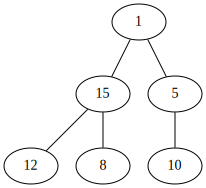

In [210]:
xs = [None, 1, 15, 5, 12, 8, 10]
plotHeap(xs)

Nun stellen wir die Heapbedingung her:

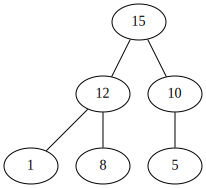

In [211]:
heapify(xs)
plotHeap(xs)

# Priority Queue mittels Heap implementieren

Das Implementieren einer Priority Queue ist nun fast trivial. 
Die Funktionen ```sink``` und ```swim``` übernehmen die ganze Arbeit.

In [190]:
class PQ:
    def __init__(self):
        self._data = [None]
        
    def isEmpty(self):
        return len(self._data) <= 1
    
    def size(self):
        return len(self._data) -1
    
    def delmax(self):
        # Grösstes Element (die Wurzel) wird mit dem Element unten Rechts vertauscht.
        # Das letzte Element (welches jetzt dem grössten Element entspricht, wird
        # entfernt. Dann wird die HeapBedingung durch "sinken" der Wurzel wiederhergestellt.
        self._data[1], self._data[-1] = self._data[-1], self._data[1]
        item = self._data.pop()
        sink(self._data, 1)
        return item
    
    def max(self):
        return self._data[1]
    
    def insert(self, item):
        # Das Element wir hinten ins Array angefügt. Dann wird die Heapbedingung
        # durch ausführen von Swim wiederhergestellt.
        self._data.append(item)
        swim(self._data, len(self._data) - 1)
        

Auch sortieren ist jetzt einfach. Wir fügen die Elemente einfach in eine PQ ein und nehmen immer das grösste raus. Da swim und sink beide in $O(log(n))$ sind, ist offensichtlich, dass dies in Zeit $O(n log(n))$ geht (n * Aufwand swim + n * Aufwand sink) 

In [191]:
testdata = [1,5, 2, 8 , 11]
pq = PQ()
for t in testdata:
    pq.insert(t)

sortedArray = []
while not pq.isEmpty():
    sortedArray.append(pq.delmax())

In [192]:
sortedArray

[11, 8, 5, 2, 1]

# Heapsort

Sortieren geht aber noch etwas eleganter, und vor allem ohne zusätzlichen Speicherverbrauch, mit dem Heapsort Algorithmus. 

Um den Heap zu erstellen, können wir die Methode ```heapify``` noch etwas effizienter implementieren, indem wir von rechts nach Links durchs Array gehen und mittels ```sink``` die Heapbedingung herstellen

In [196]:
def heapify(a):
    N = len(a) - 1
    for k in range(int(N//2), 0, -1):
        sink(a, k)

Wir testen dies für ein beliebiges Array:

In [200]:
xs = [None, 3, 7, 1, 8]
heapify(xs)

Der Heapsort besteht jetzt aus 2 Schritten. 

1. Heap herstellen
2. Grösstes Element mit letztem Element tauschen und Heap herstellen
   * Dabei wird der bereich im Array auf dem Heapsort arbeitet immer kleiner

In [201]:
def heapsort(a):
    N = len(a) - 1
    for k in range(int(N//2), 0, -1):
        sink(a, k)
    while N > 1:
        a[1], a[N] = a[N], a[1]
        N -= 1
        sink(a, 1, N + 1)      

In [207]:
testarray = [None, 3, 1, 8, 11, 7, 9]
heapsort(testarray)
print(testarray)

[None, 1, 3, 7, 8, 9, 11]
